In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df1 = pd.read_csv("C:\\Users\\alper\\Desktop\\dataset\\title.basics.tsv\\data.tsv", delimiter='\t', encoding='utf-8', low_memory=False)

In [75]:
df1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [76]:
df2 = pd.read_csv("C:\\Users\\alper\\Desktop\dataset\\title.ratings.tsv\\data.tsv", delimiter='\t', encoding='utf-8')

In [77]:
df2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2011
1,tt0000002,5.7,271
2,tt0000003,6.5,1931
3,tt0000004,5.4,179
4,tt0000005,6.2,2702


In [78]:
merged_data = pd.merge(df1, df2, on='tconst')

In [79]:
merged_data.head()


"ADDED"
merged_data.to_csv('old_data.csv', index=False)


In [80]:
filtered_data = merged_data[merged_data['titleType'] == 'movie']

In [81]:
filtered_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,489
333,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,861
373,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21


In [82]:
merged_data['startYear'] = pd.to_numeric(merged_data['startYear'], errors='coerce')

In [83]:
filtered_data = merged_data[(merged_data['titleType'] == 'movie') & (merged_data['startYear'].notna()) & (merged_data['startYear'] >= 1965)]

In [84]:
filtered_data['startYear'] = filtered_data['startYear'].astype(int, errors='ignore')

C:\Users\alper\AppData\Local\Temp\ipykernel_6864\1469973035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['startYear'] = filtered_data['startYear'].astype(int, errors='ignore')


In [85]:
filtered_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,94,Documentary,6.8,62
4267,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N,5.2,16
4382,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.1,27
12138,tt0028248,movie,Shipmates o' Mine,Shipmates o' Mine,0,2022,\N,87,Musical,4.2,42
14672,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,86,Comedy,6.7,14


In [86]:
filtered_data.drop(['primaryTitle', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


C:\Users\alper\AppData\Local\Temp\ipykernel_6864\826935957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['primaryTitle', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


In [87]:
filtered_data.head()

,tconst,titleType,originalTitle,isAdult,startYear,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,Documentary,6.8,62
4267,tt0015414,movie,La tierra de los toros,0,2000,\N,5.2,16
4382,tt0015724,movie,Dama de noche,0,1993,"Drama,Mystery,Romance",6.1,27
12138,tt0028248,movie,Shipmates o' Mine,0,2022,Musical,4.2,42
14672,tt0031458,movie,El huésped del sevillano,0,1970,Comedy,6.7,14


In [88]:
filtered_data = filtered_data[filtered_data['genres'] != '\\N']


In [89]:
filtered_data.head()

,tconst,titleType,originalTitle,isAdult,startYear,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,Documentary,6.8,62
4382,tt0015724,movie,Dama de noche,0,1993,"Drama,Mystery,Romance",6.1,27
12138,tt0028248,movie,Shipmates o' Mine,0,2022,Musical,4.2,42
14672,tt0031458,movie,El huésped del sevillano,0,1970,Comedy,6.7,14
17995,tt0035423,movie,Kate & Leopold,0,2001,"Comedy,Fantasy,Romance",6.4,88220


In [90]:
print(filtered_data.describe())

           startYear  averageRating      numVotes
count  249566.000000  249566.000000  2.495660e+05
mean     2004.008014       6.180324  4.194982e+03
std        16.100526       1.422412  3.905825e+04
min      1965.000000       1.000000  5.000000e+00
25%      1993.000000       5.300000  2.000000e+01
50%      2010.000000       6.300000  6.900000e+01
75%      2017.000000       7.200000  3.610000e+02
max      2023.000000      10.000000  2.832685e+06


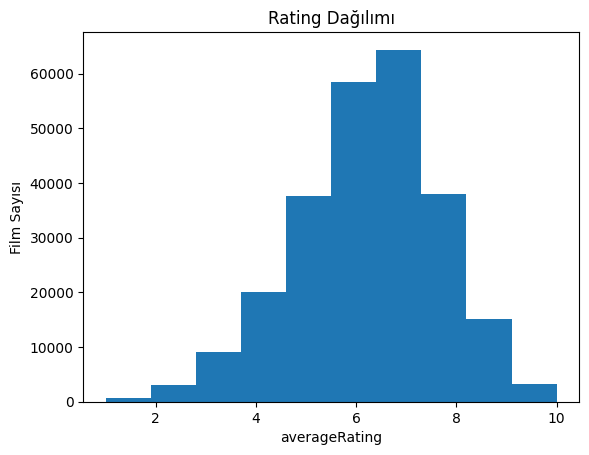

In [91]:
# Rating dağılımını görselleştir
plt.hist(filtered_data['averageRating'])
plt.xlabel('averageRating')
plt.ylabel('Film Sayısı')
plt.title('Rating Dağılımı')
plt.show()


In [92]:
kategori_counts = filtered_data['genres'].value_counts()
print(kategori_counts)
print(filtered_data.head())


genres
Drama                         43218
Documentary                   31163
Comedy                        19871
Comedy,Drama                   8701
Drama,Romance                  7184
                              ...  
Animation,Fantasy,Thriller        1
Drama,Horror,Sport                1
Fantasy,War                       1
Animation,Crime,Sci-Fi            1
Action,Documentary,Mystery        1
Name: count, Length: 1195, dtype: int64
          tconst titleType                originalTitle isAdult  startYear  \
3592   tt0013274     movie  Istoriya grazhdanskoy voyny       0       2021   
4382   tt0015724     movie                Dama de noche       0       1993   
12138  tt0028248     movie            Shipmates o' Mine       0       2022   
14672  tt0031458     movie     El huésped del sevillano       0       1970   
17995  tt0035423     movie               Kate & Leopold       0       2001   

                       genres  averageRating  numVotes  
3592              Documentary  

In [93]:
"REMOVED"
#correlation_matrix = filtered_data.corr()
#print(correlation_matrix)

"ADDED"
# AFTER
# 7 and 8th items
temp_df = filtered_data.iloc[:, [4,6,7]]
print(temp_df.head())

# Add year into corr.

# Min-Max normalization process 

# Scales each element between 0 and 1 by dividing it by the range of values ​​for that column.
normalized_df = (temp_df - temp_df.min()) / (temp_df.max() - temp_df.min()) 

# scaling between -1 and 1 
normalized_df = 2 * normalized_df - 1

print(normalized_df)

correlation_matrix = normalized_df.corr()
print(correlation_matrix.head())


       startYear  averageRating  numVotes
3592        2021            6.8        62
4382        1993            6.1        27
12138       2022            4.2        42
14672       1970            6.7        14
17995       2001            6.4     88220
         startYear  averageRating  numVotes
3592      0.931034       0.288889 -0.999960
4382     -0.034483       0.133333 -0.999984
12138     0.965517      -0.288889 -0.999974
14672    -0.827586       0.266667 -0.999994
17995     0.241379       0.200000 -0.937716
...            ...            ...       ...
1382882   0.896552       0.066667 -0.998974
1382886   0.896552       0.200000 -0.996015
1382891   0.862069      -0.444444 -0.999992
1382897   0.862069       0.688889 -0.999999
1382910   0.793103       0.466667 -0.999996

[249566 rows x 3 columns]
               startYear  averageRating  numVotes
startYear       1.000000       0.084943  0.008865
averageRating   0.084943       1.000000  0.061919
numVotes        0.008865       0.061919  1.

In [94]:
filtered_data.isnull().sum()

tconst           0
titleType        0
originalTitle    0
isAdult          0
startYear        0
genres           0
averageRating    0
numVotes         0
dtype: int64

In [95]:
"REMOVED"
#filtered_data = pd.get_dummies(filtered_data, columns=['genres'])

'REMOVED'

In [96]:
# df, değiştirdiğiniz DataFrame'in adı olsun
'Removed'
#filtered_data.to_csv('new_data.csv', index=False)
'Added'
sorted_filtered_data = filtered_data.sort_values(by='numVotes', ascending=False)
# DataFrame'in satır sayısını bulalım
row_count = len(sorted_filtered_data)

# DataFrame'i ikiye bölelim
first_half_sorted_filtered_data = sorted_filtered_data.iloc[:row_count//4]  # İlk yarı

first_half_sorted_filtered_data.to_csv('new_data.csv', index=False)